# Prepro
Split  y one hot

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
import pickle
import numpy as np
import matplotlib.pyplot as plt

x,y = pickle.load( open( "iemocap1.pk", "rb" ) )
x = np.array(x).reshape(-1,64,64,1)

onehot_encoder = LabelBinarizer()
y = onehot_encoder.fit_transform(y)
# print ( onehot_encoder.classes_ )
# print(y.shape)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 61, 61, 32)        544       
_________________________________________________________________
dropout_4 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 57, 57, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 23104)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

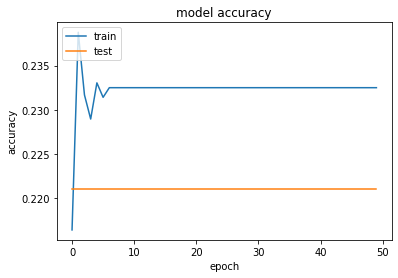

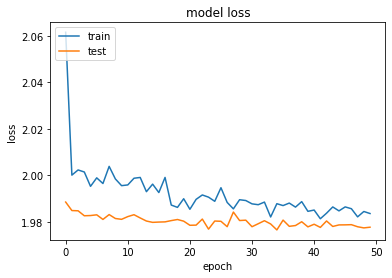

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape=(64,64,1),activation="relu"))
model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(128,activation="sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="sigmoid"))
model.summary()


model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=50, batch_size=64,validation_data=(x_test,y_test))
print ( history.history.keys() ) 

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()